In [139]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [140]:
data = pd.read_csv('E:\\My folder\\ExcelR(documents)\\Assignments\\Text Mining-11\\reviews_dataset.csv')

# Data Analysis for Sentiment Analysis

In [141]:
data.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"


In [142]:
data.shape

(3222, 9)

In [143]:
data.columns

Index(['name', 'description', 'rating', 'likes_count', 'verified', 'images',
       'reviewed_at', '_id', 'crawled_at'],
      dtype='object')

In [144]:
# Renaming columns for ease of reference
data = data.rename({'likes_count':'likescount' ,'reviewed_at':'reviewed' ,'_id':'id','crawled_at':'time'}, axis = 1)
data.head()

,name,description,rating,likescount,verified,images,reviewed,id,time
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"


In [145]:
# Checking for NA values
data.isna().sum()

name              0
description       0
rating            0
likescount        0
verified          0
images         2377
reviewed          0
id                0
time              0
dtype: int64

In [146]:
# images show null value.(Not Considerable)
# We don't use it in sentiment analysis so directly we can drop images column.

In [147]:
data=data.drop(['name', 'likescount', 'images','verified','time'], axis=1)
data.head()

,description,rating,reviewed,id
0,Super I loved it,5,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82
1,My little brother is using it . His mother lov...,5,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82
2,I've always used sebamed products for my kid. ...,5,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82
3,Great soaps for kids. Smells amazing too,5,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82
4,Nice soap with mild properties,5,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82


In [148]:
# Handling review_time column
'''Here we have an unusual reviewed column which has date and time, once we split both we will split the date 
further into month and date '''

# new data frame which has date and year
new = data["reviewed"].str.split(",",n = 1, expand = True) 
  
# making separate date column from new data frame 
data["date"]= new[0] 

data=data.drop(['reviewed'], axis=1)
data.head()

,description,rating,id,date
0,Super I loved it,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-05 21:18:36
1,My little brother is using it . His mother lov...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-09-09 12:19:31
2,I've always used sebamed products for my kid. ...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08 17:18:56
3,Great soaps for kids. Smells amazing too,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-12-07 11:33:44
4,Nice soap with mild properties,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-06-24 13:44:32


In [149]:
# Splitting the date 
new1 = data["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
data["Date"]= new1[0] 
  
data=data.drop(['date'], axis=1)
data.head()

,description,rating,id,Date
0,Super I loved it,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-05
1,My little brother is using it . His mother lov...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-09-09
2,I've always used sebamed products for my kid. ...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08
3,Great soaps for kids. Smells amazing too,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-12-07
4,Nice soap with mild properties,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-06-24


# removing the punctuations

In [150]:
#Creating a copy 
clean_reviews = data.copy()

In [151]:
import re

In [152]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [153]:
data['description'] = data['description'].apply(lambda x: review_cleaning(x))

In [154]:
data.head()

,description,rating,id,Date
0,super i loved it,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-05
1,my little brother is using it his mother love...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-09-09
2,ive always used sebamed products for my kid no...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08
3,great soaps for kids smells amazing too,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-12-07
4,nice soap with mild properties,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-06-24


In [155]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [156]:
data['description'] = data['description'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
data.head()

,description,rating,id,Date
0,super loved,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-05
1,little brother using mother loves,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-09-09
2,ive always used sebamed products kid no disapp...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08
3,great soaps kids smells amazing,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-12-07
4,nice soap mild properties,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-06-24


# Calculating sentiment value for reviews

In [157]:
afinn = pd.read_csv('E:\\My folder\\ExcelR(documents)\\Assignments\\Text Mining-11\\Afinn.csv.xls', sep=',', encoding='latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [158]:
afinn.shape

(2477, 2)

In [159]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [160]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [161]:
# test that it works
calculate_sentiment(text = 'nice')

3

In [162]:
data['sentiment_value'] = data['description'].apply(calculate_sentiment)

In [163]:
data

,description,rating,id,Date,sentiment_value
0,super loved,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-05,6
1,little brother using mother loves,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-09-09,3
2,ive always used sebamed products kid no disapp...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08,-3
3,great soaps kids smells amazing,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-12-07,7
4,nice soap mild properties,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-06-24,3
...,...,...,...,...,...
3217,satisfy productit best product skin,5,3aec5525-7284-5a84-9ea6-1cd8066828e1,2020-07-25,3
3218,best wet wipes till date babies us also,5,3aec5525-7284-5a84-9ea6-1cd8066828e1,2020-03-14,0
3219,soft light smell use face wipes traveling lot ...,5,3aec5525-7284-5a84-9ea6-1cd8066828e1,2020-03-09,1
3220,makes skin smooth cleans dirt away skin quite ...,5,3aec5525-7284-5a84-9ea6-1cd8066828e1,2020-03-05,3


In [164]:
# how many words are in the sentence?
data['word_count'] = data['description'].str.split().apply(len)
data['word_count']

0        2
1        5
2        8
3        5
4        4
        ..
3217     5
3218     8
3219    11
3220    10
3221     8
Name: word_count, Length: 3222, dtype: int64

In [165]:
data.sort_values(by='sentiment_value')

,description,rating,id,Date,sentiment_value,word_count
2579,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
2143,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
1750,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
1345,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
2988,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
...,...,...,...,...,...,...
2350,first shot spring water kind product not know ...,5,e40aa860-1c61-5b60-b12a-a43e2334b615,2017-02-02,17,40
439,amazing product sensitive skin fragrance amazi...,5,b4c1768c-8978-5b17-b626-ac787e8299af,2019-03-05,17,15
79,thank nykaa really good baby loved smells good...,5,840886ac-0910-57b7-bd57-67d2023c11de,2018-11-02,18,24
2282,brought gift father says refreshing lasts arou...,4,ba274fa8-06d8-5ab3-a94b-5f835c71815c,2017-05-25,18,36


In [166]:
# Maximum sentiment value
data['sentiment_value'].max()

20

In [167]:
# review which is having max sentiment value
data[data['sentiment_value']==20]

,description,rating,id,Date,sentiment_value,word_count
2172,received package containing body wash nivea im...,5,0038a9d4-097a-5287-9b56-5e51b13a0b9e,2021-06-07,20,48


In [168]:
# Full review at index 412
data['description'][412]

'great fragrance nourishes hair reduce hair fall keeps smooth shiny every wash nice smell highly recommended'

In [169]:
# minimum sentiment value
data['sentiment_value'].min()

-7

In [170]:
# review which is having min sentiment value
data[data['sentiment_value']==-7]

,description,rating,id,Date,sentiment_value,word_count
1345,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
1750,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
2025,worst deodorant ever used no fragnace stays ma...,1,37abd6e0-aa46-5852-b401-5fe62c751f56,2021-04-13,-7,12
2143,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
2579,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7
2988,works well irritated skin no bad reviews,5,ccc29191-d401-51f9-83de-d7eabcc7c188,2020-06-23,-7,7


In [171]:
# Sentiment score of the whole review
data['sentiment_value'].describe()

count    3222.000000
mean        3.385475
std         3.231099
min        -7.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        20.000000
Name: sentiment_value, dtype: float64

In [172]:
# Sentiment score of the whole review
data[data['sentiment_value']<=0]

,description,rating,id,Date,sentiment_value,word_count
2,ive always used sebamed products kid no disapp...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08,-3,8
6,soap gentle skindoes not makes skin dry,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-07-27,0,7
9,product really gentle skin,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-17,0,4
10,use sience many years sebamed brand never pls ...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-15,0,12
12,creamy nyc one infants,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-01,0,4
...,...,...,...,...,...,...
3197,gentle skin multi purpose product,5,60004029-1593-5687-9458-1da9ee849673,2020-06-01,0,5
3199,lve,5,60004029-1593-5687-9458-1da9ee849673,2020-03-09,0,1
3211,tried first time damn make job easy,5,3aec5525-7284-5a84-9ea6-1cd8066828e1,2020-11-06,-3,7
3214,absolute favourite gonna stock,5,3aec5525-7284-5a84-9ea6-1cd8066828e1,2020-09-26,0,4


In [173]:
data[data['sentiment_value']>=10]

,description,rating,id,Date,sentiment_value,word_count
34,already used three bottles great makes hair mu...,5,c04ece13-ce9f-5fa3-9c9c-86374f76a56a,2021-05-22,16,30
46,ordered cream daughter good n daughter love ye...,5,9ef12bed-3e21-52c0-b1b4-a6ecb8004997,2021-05-29,15,25
54,best sensitive skin happy amazing cream skin b...,5,9ef12bed-3e21-52c0-b1b4-a6ecb8004997,2020-01-10,12,10
69,jar good gift well good products like packaging,5,840886ac-0910-57b7-bd57-67d2023c11de,2018-12-02,10,8
79,thank nykaa really good baby loved smells good...,5,840886ac-0910-57b7-bd57-67d2023c11de,2018-11-02,18,24
...,...,...,...,...,...,...
3147,nice fragrance perfect men dont like strong deos,4,a85df139-29f5-5c31-b6ae-66808e03b461,2019-04-05,10,8
3170,good redness instantly soothes cool down skin ...,5,ea9f45c3-9e73-55d7-a44e-3e82a73cb194,2020-01-02,10,11
3178,spray calms soothes skin effectively used remo...,5,ea9f45c3-9e73-55d7-a44e-3e82a73cb194,2019-11-29,10,13
3192,since work beauty blogger already spend much m...,5,60004029-1593-5687-9458-1da9ee849673,2020-08-27,11,65


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

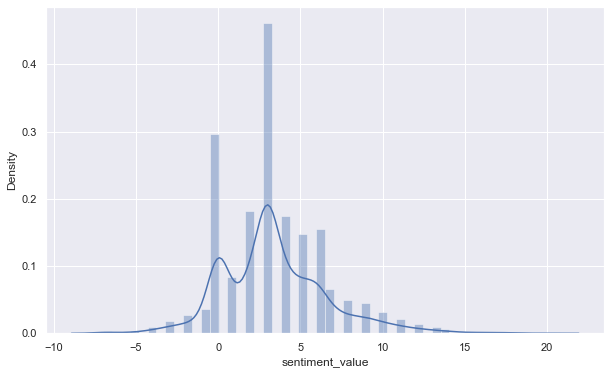

In [174]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(data['sentiment_value'])

In [175]:
data['index']=range(0,len(data))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

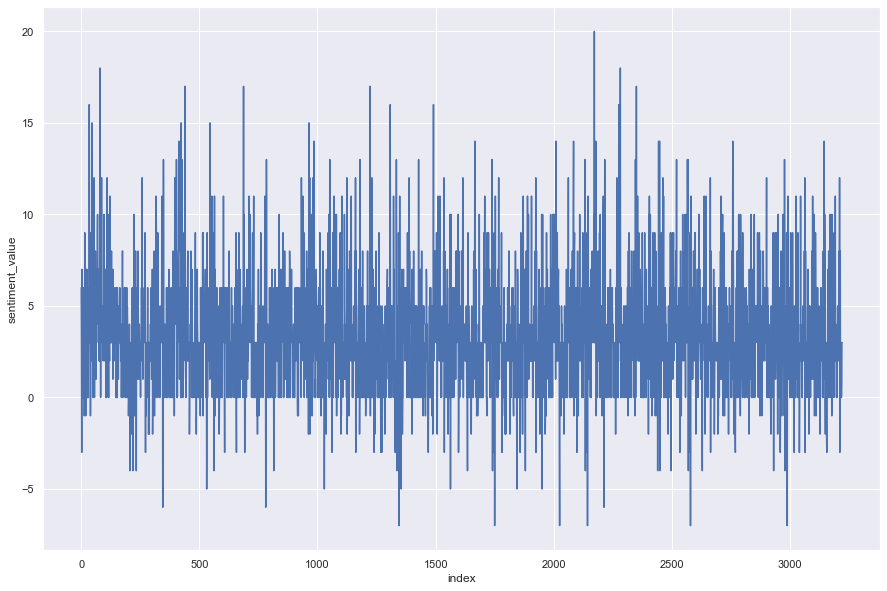

In [176]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

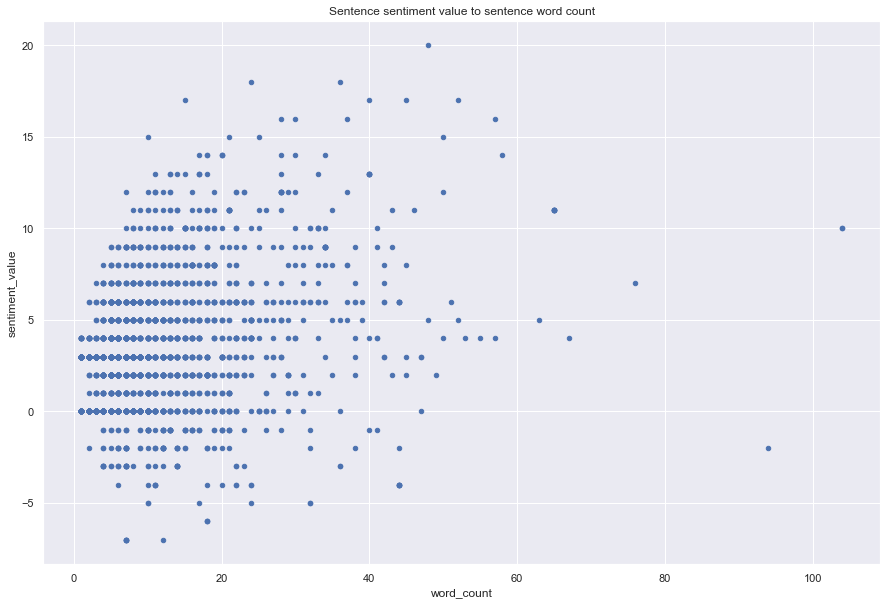

In [177]:
data.plot.scatter(x='word_count', y='sentiment_value', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [178]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_value'] < 0:
        val = 'Negative'
    elif row['sentiment_value'] == 0: 
        val = 'Neutral'
    elif row['sentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [179]:
#Applying the function in our new column
data['sentiment_category'] = data.apply(sentiment_cat, axis=1)
data.head()

,description,rating,id,Date,sentiment_value,word_count,index,sentiment_category
0,super loved,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-04-05,6,2,0,Positive
1,little brother using mother loves,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-09-09,3,5,1,Positive
2,ive always used sebamed products kid no disapp...,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2021-01-08,-3,8,2,Negative
3,great soaps kids smells amazing,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-12-07,7,5,3,Positive
4,nice soap mild properties,5,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,2020-06-24,3,4,4,Positive


In [180]:
data['sentiment_category'].value_counts()

Positive    2529
Neutral      516
Negative     177
Name: sentiment_category, dtype: int64

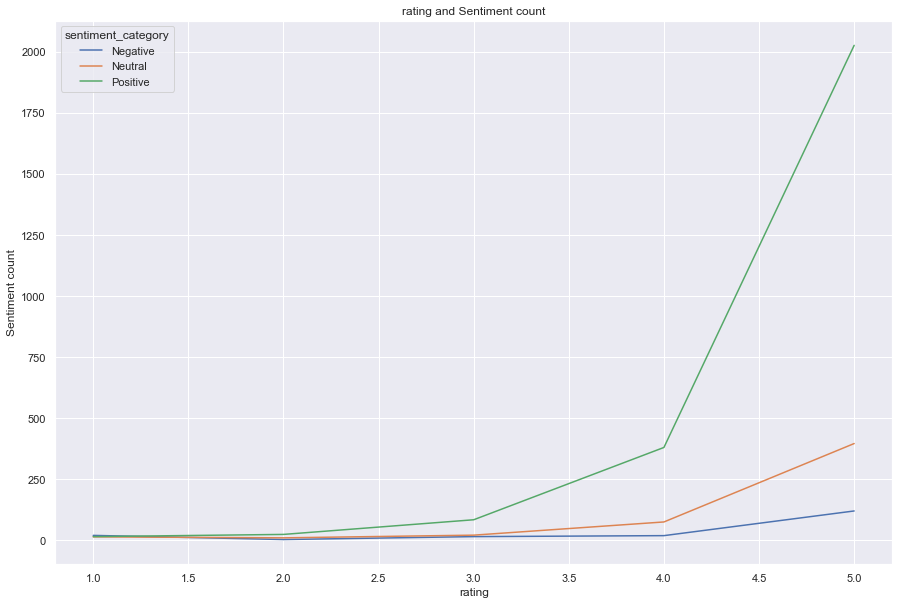

In [181]:
# Year vs Sentiment count
data.groupby(['rating','sentiment_category'])['sentiment_category'].count().unstack().plot(figsize = (15,10),legend=True)
plt.title('rating and Sentiment count')
plt.xlabel('rating')
plt.ylabel('Sentiment count')
plt.show()

# WordCloud

In [182]:
string_Total = " ".join(data["description"])

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

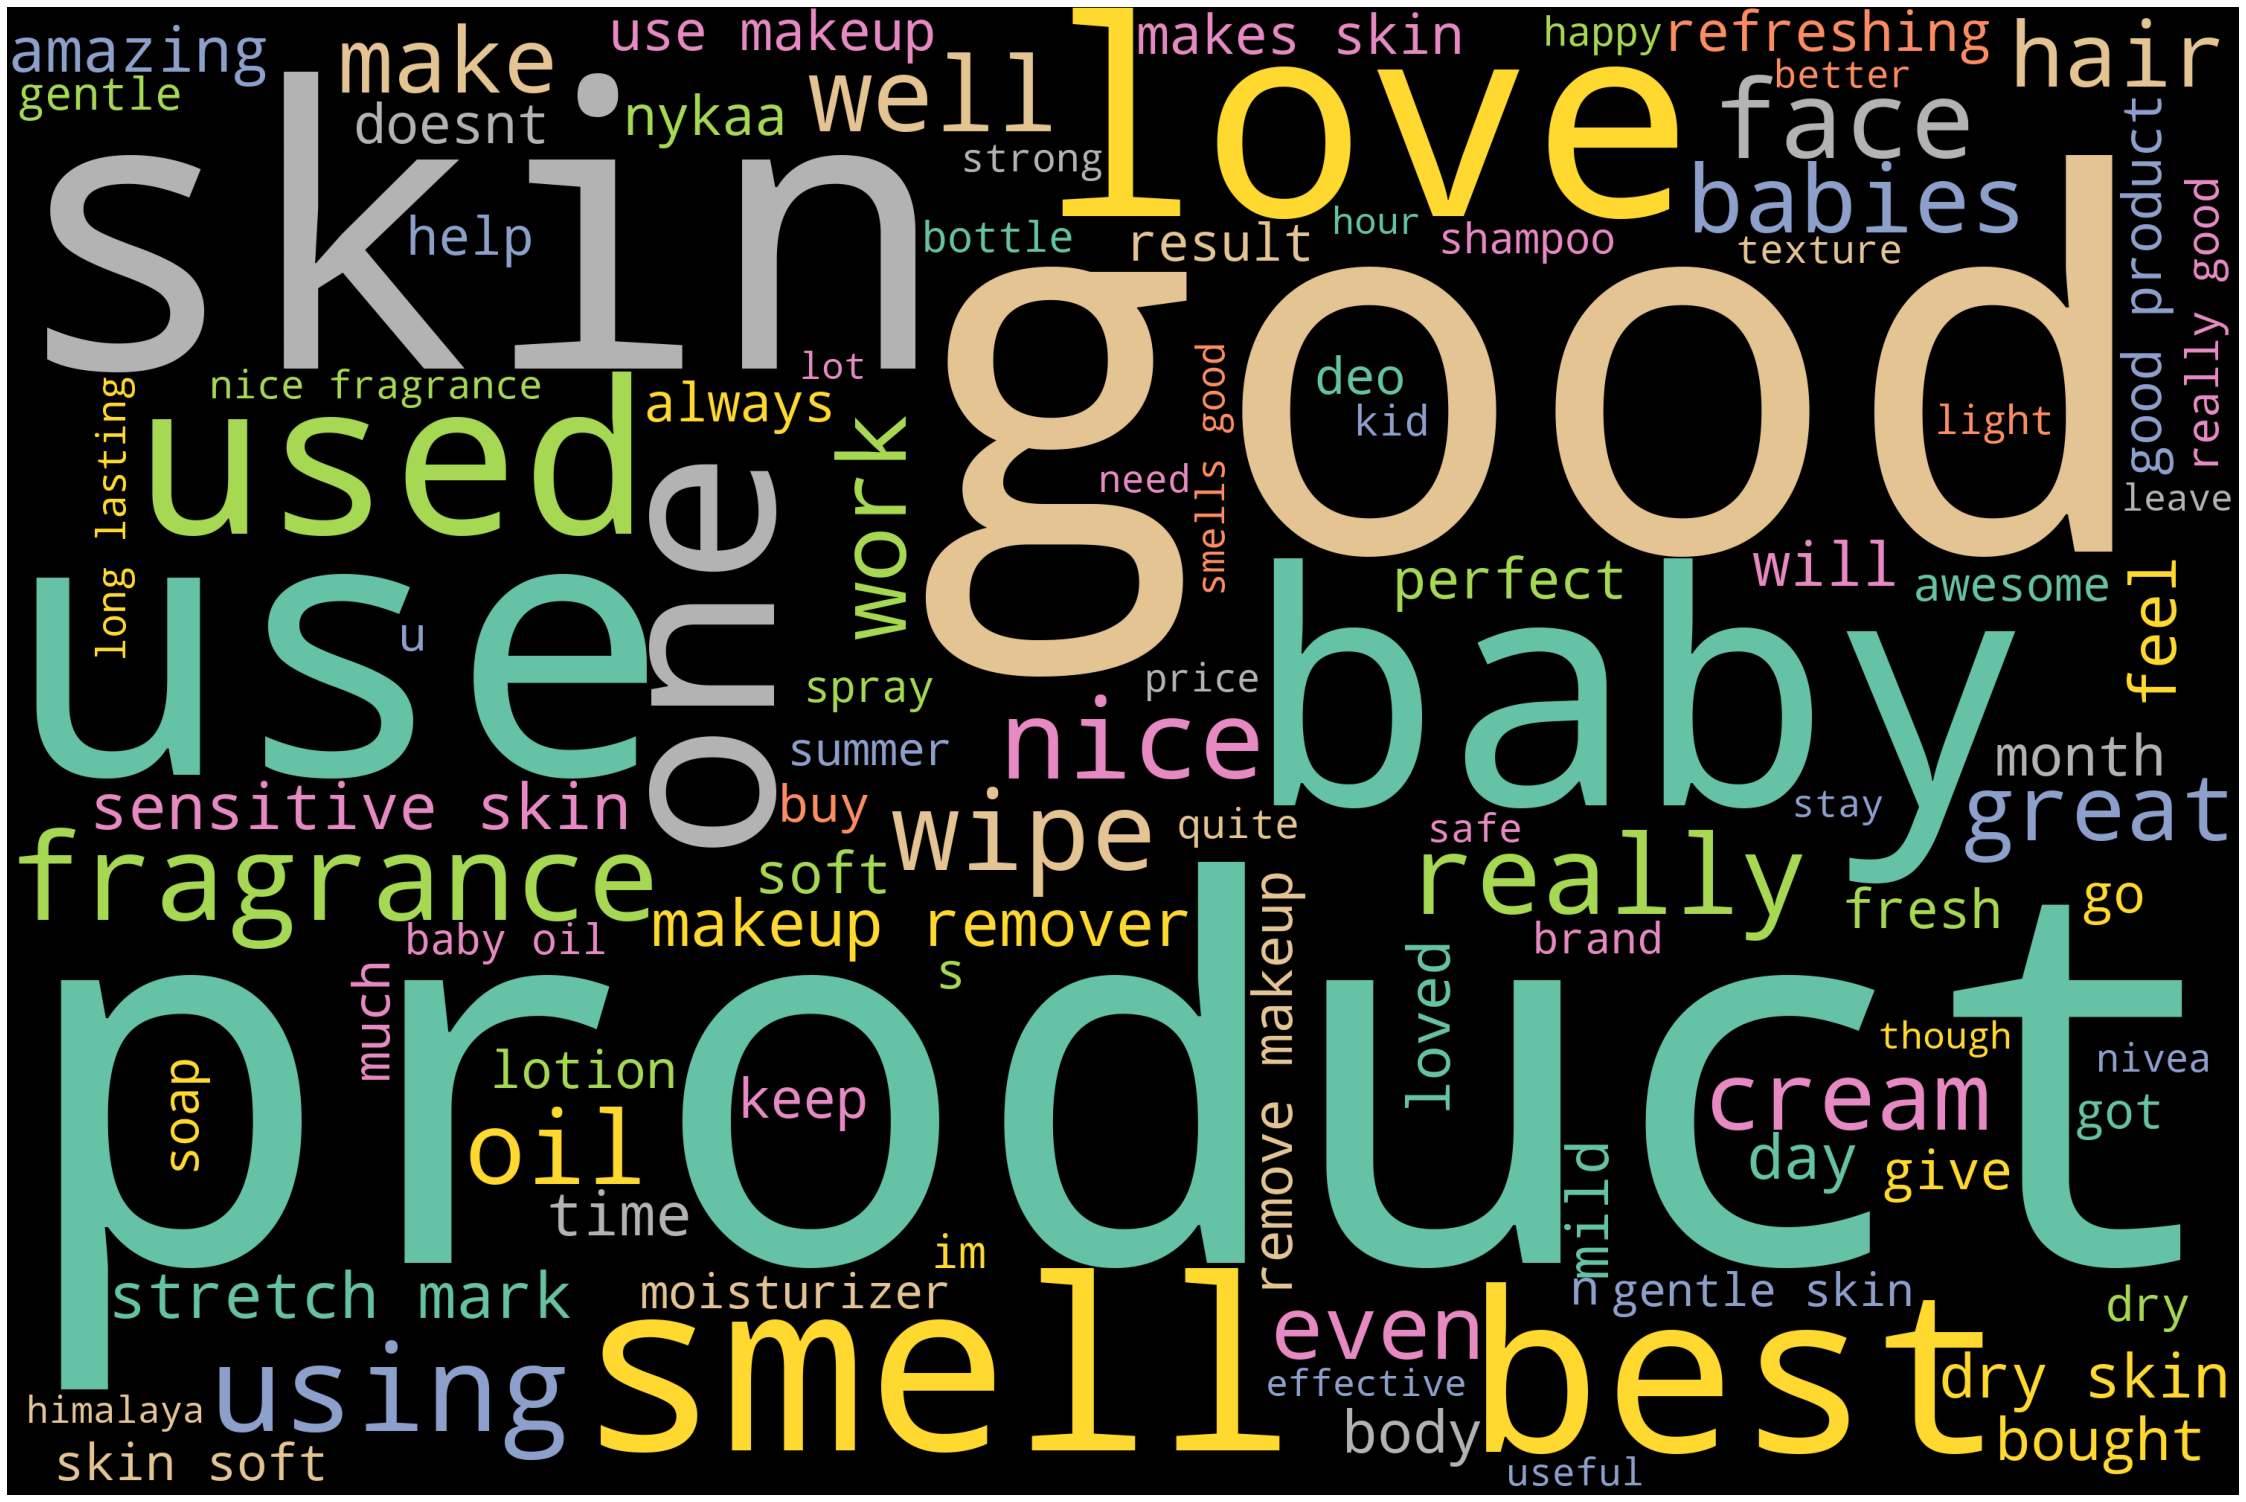

In [186]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black', width = 3000, height = 2000,max_words=100,colormap='Set2').generate(string_Total)
plot_cloud(wordcloud_stw)